# Introduction
In this part we will introduce the project

In [3]:
# from __future__ import absolute_import, division, print_function, unicode_literals

import utils
import preprocessing as pre
import numpy as np
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
import cv2
import NN as nn

# Exploring Data

The first step, is to explore the data we are going to use, i.e. the total number of classes, the number of training samples and the number of testing samples.<br>
Then, we will create two dataset instances using the Dataset class defined in the NN module.

In [4]:
# Getting information about data

data_dir = "data"
train_data_dir, train_labels_path = "data/gtsrb-german-traffic-sign/Train", "data/gtsrb-german-traffic-sign/Train.csv"
test_data_dir, test_labels_path = "data/gtsrb-german-traffic-sign/Test", "data/gtsrb-german-traffic-sign/Test.csv"

utils.data_info(data_dir, train_data_dir, test_data_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\gtsrb-german-traffic-sign\\Train'

In [3]:
train_data_set = nn.Dataset(train_data_dir, train_labels_path, data='train')
test_data_set = nn.Dataset(test_data_dir, test_labels_path, data='test')

(39209,) (39209, 1)
(12630,) (12630, 1)


In [4]:
# Class labels
classes = np.unique(train_data_set.y)

In [5]:
meta_data_dir = Path("data/gtsrb-german-traffic-sign/Meta")
meta_data_set = []
for _class in classes:
    img_path = meta_data_dir/(str(_class) + ".png")
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    meta_data_set.append(img)
meta_data_set.append(np.ones((100,100,3)))

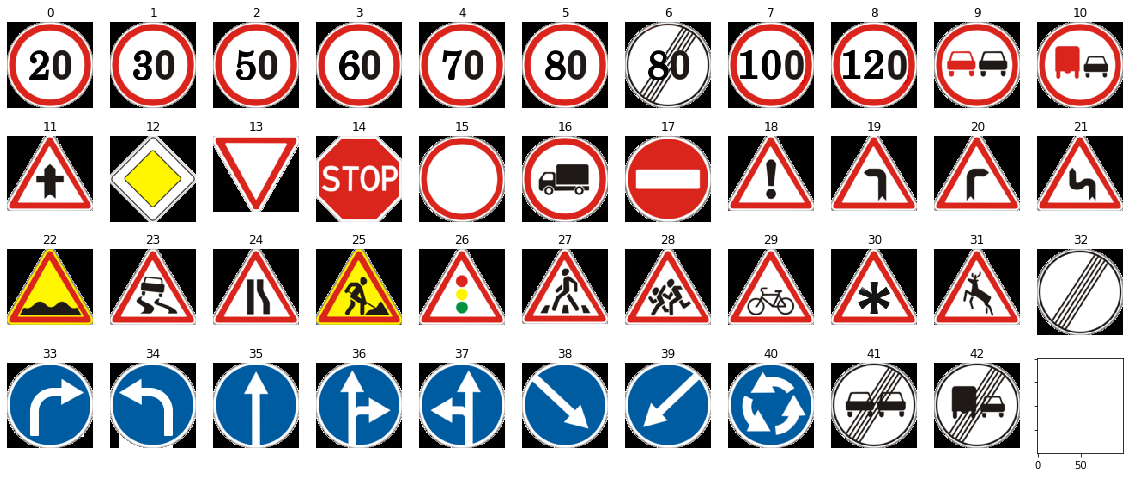

In [7]:
fig, axes = plt.subplots(4, 11, sharex=True, sharey=True, figsize=(20,8))
axes = axes.flatten()
for img, _class, ax in zip(meta_data_set, classes, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(_class)
plt.show()

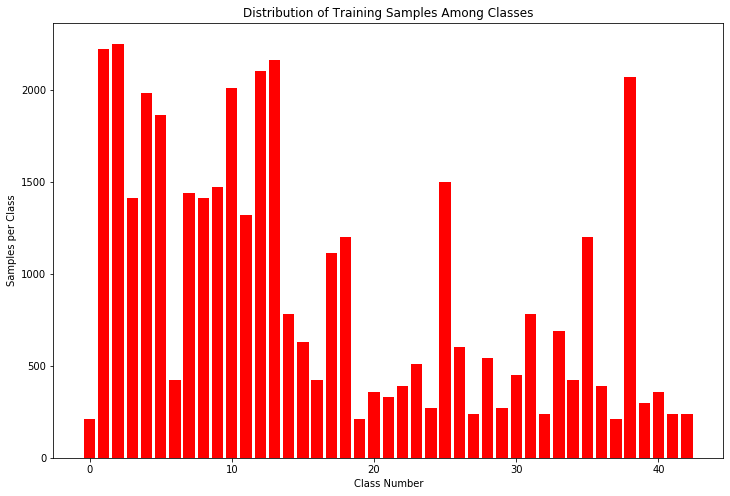

In [8]:
utils.classDistribution(train_data_set.y)

Text(0.5, 1.0, 'Distribution of Image Sizes of The Testing Dataset')

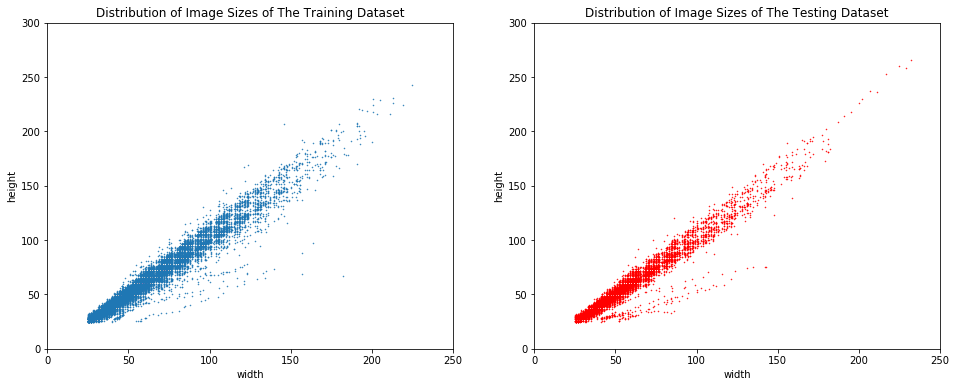

In [8]:
ws_train, hs_train = list(), list()
ws_test, hs_test = list(), list()
for img in train_data_set.X:
    ws_train.append(img.shape[0])
    hs_train.append(img.shape[1])
for img in test_data_set.X:
    ws_test.append(img.shape[0])
    hs_test.append(img.shape[1])

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.scatter(ws_train, hs_train, s=1, marker='.')
plt.xlabel('width')
plt.ylabel('height')
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.title('Distribution of Image Sizes of The Training Dataset')

plt.subplot(122)
plt.scatter(ws_test, hs_test, s=1, marker='.', c='r')
plt.xlabel('width')
plt.ylabel('height')
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.title('Distribution of Image Sizes of The Testing Dataset')

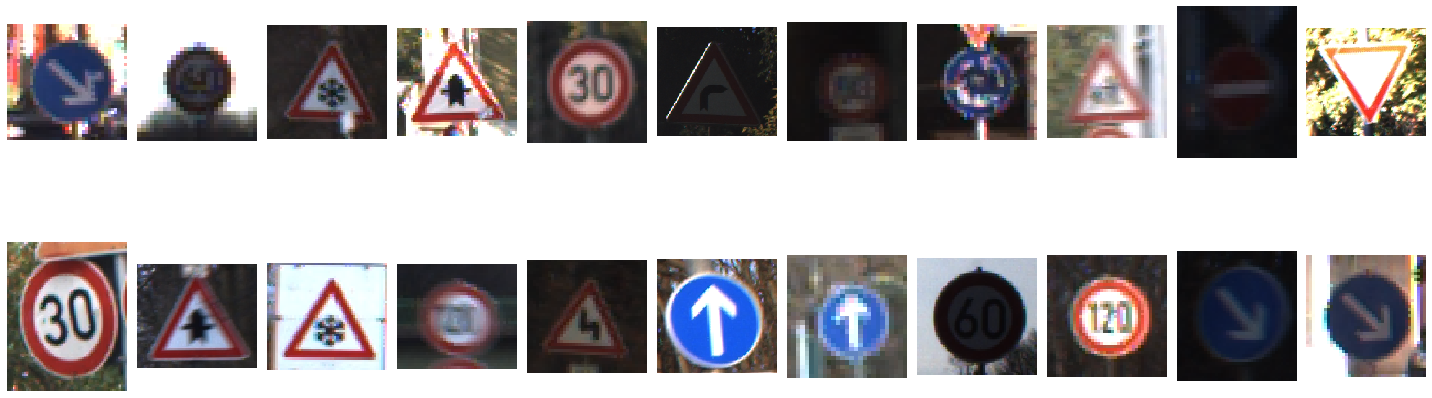

In [9]:
# Randomly pick and show 10 images from the tarining data

random.seed(6)
rand_imgs = random.sample(list(train_data_set.X), 22)
utils.plotImages(rand_imgs)

# Data Preprocessing

In [10]:
# Rshaping to 32x32 images

reshaped_train_images = []
for image in train_data_set.X:
    dst = pre.eqHist(image)
    dst = pre.reshape(dst)
    reshaped_train_images.append(dst)
train_data_set.X = reshaped_train_images

reshaped_test_images = []
for image in test_data_set.X:
    dst = pre.eqHist(image)
    dst = pre.reshape(dst)
    reshaped_test_images.append(dst)
test_data_set.X = reshaped_test_images

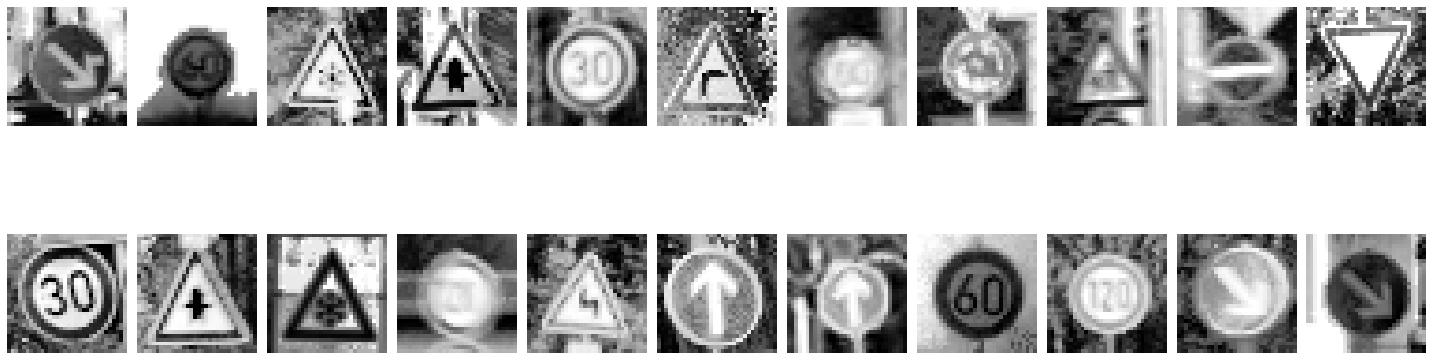

In [11]:
random.seed(6)
utils.plotImages(random.sample(train_data_set.X, 22), cmap='gray')

# Training a NN model

In [12]:
reshaped_train_images = []
for image in train_data_set.X:
    dst = image.reshape(-1,1)
    reshaped_train_images.append(dst)
train_data_set.X = np.asarray(reshaped_train_images)

In [13]:
reshaped_test_images = []
for image in test_data_set.X:
    dst = image.reshape(-1,1)
    reshaped_test_images.append(dst)
test_data_set.X = np.asarray(reshaped_test_images)

In [14]:
mlp = nn.MLP("NN.dat", train_data_set, print_step=1, verbose=1)

In [ ]:
mlp.train(n_epochs=10, learning_rate=2, decay=1.)

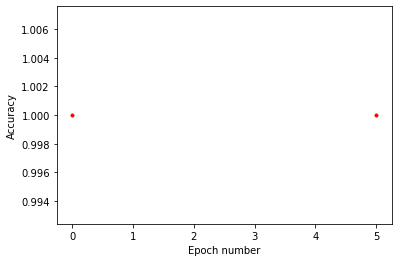

In [26]:
mlp.make_plot()

In [45]:
mlp.setdataset(test_data_set)

In [46]:
mlp.print_accuracy()

Accuracy: 100.0 %


# Training a CNN model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import optimizers

In [7]:
# Linear stack of layers.
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
train_data_set.X = np.array(train_data_set.X).reshape((39209,32,32,1))# / 255.0
train_data_set.y = np.array(train_data_set.y).reshape((39209,1))

test_data_set.X = np.array(test_data_set.X).reshape((12630,32,32,1))# / 255.0
test_data_set.y = np.array(test_data_set.y).reshape((12630,1))

In [12]:
test_data_set.X.shape

(12630, 32, 32, 1)

In [13]:
model.compile(optimizer=optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_set.X, train_data_set.y, epochs=5)

Train on 39209 samples
Epoch 1/5
39209/39209 [==============================] - 29s 728us/sample - loss: 1.0861 - accuracy: 0.7483
Epoch 2/5
39209/39209 [==============================] - 29s 729us/sample - loss: 0.1841 - accuracy: 0.9475
Epoch 3/5
39209/39209 [==============================] - 29s 733us/sample - loss: 0.1409 - accuracy: 0.9631
Epoch 4/5
39209/39209 [==============================] - 25s 647us/sample - loss: 0.1222 - accuracy: 0.9695
Epoch 5/5
39209/39209 [==============================] - 26s 655us/sample - loss: 0.1137 - accuracy: 0.9736


In [14]:
loss_and_metrics = model.evaluate(test_data_set.X, test_data_set.y, verbose=0)

In [15]:
loss_and_metrics

[0.6533351728076527, 0.92549485]

# Old Notebook

In [16]:
# Defining the model constants

epochs = 4
img_width, img_height = 150, 150
batch_size = 32
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 4
lr = 0.0004

In [18]:
# Creating the model

start = time.time()

model = Sequential()
model.add(Convolution2D(nb_filters1,
                        conv1_size,
                        conv1_size,
                        input_shape=(img_width, img_height, 3)
                       )
         )

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

target_dir = './models'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")

Found 39209 images belonging to 43 classes.
Found 0 images belonging to 0 classes.
Epoch 1/4


ValueError: A target array with shape (32, 43) was passed for an output of shape (None, 4) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [47]:
start = time.time()
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
#Define Path
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
test_path = os.path.join(cur_path, 'data1\\test')
model = load_model(model_path)
model.load_weights(model_weights_path)
#Define image parameters
img_width, img_height = 150, 150
testing_images=0
correct=0
labels = [0,12,32,33] #classes
#Prediction Function
def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  print(file)
    
  #we will extract them later on from the csv file
  true_label=file.split('\\')[-1].split('/')[0]
  
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  print(result)
  answer = np.argmax(result)
  print(answer)
  global testing_images
  global correct
  testing_images=testing_images+1
  if(str(labels[answer]) == str(true_label)):
    correct=correct+1
    #print("ADIBADIBAIDBADIB")
#   if answer == 1:
#     print("20")
#   elif answer == 0:
#     print("30ADIB")
#   elif answer == 2:
#     print("50ADIB")

  return answer
#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    result = predict(ret[0] + '/' + filename)
    print(" ")

#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")
    
print("Correct: "+str(correct))
print("Incorrect: "+ str(testing_images-correct))

C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00000_00027.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00000_00027.png
[1. 0. 0. 0.]
0
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00001_00012.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00001_00012.png
[1. 0. 0. 0.]
0
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00001_00022.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00001_00022.png
[1. 0. 0. 0.]
0
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00002_00018.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00002_00018.png
[1. 0. 0. 0.]
0
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0/00000_00002_00025.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\dat

[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00007_00022.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00007_00022.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00008_00027.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00008_00027.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00009_00005.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00009_00005.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00009_00008.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00009_00008.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00009_00015.png
C:\Users\User\Desktop\traffic_sign\gt

[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00023_00025.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00023_00025.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00001.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00001.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00002.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00002.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00014.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00014.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00024_00020.png
C:\Users\User\Desktop\traffic_sign\gt

[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00035_00029.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00035_00029.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00004.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00004.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00025.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00025.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00026.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00036_00026.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00037_00000.png
C:\Users\User\Desktop\traffic_sign\gt

[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00047_00015.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00047_00015.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00047_00018.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00047_00018.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00048_00006.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00048_00006.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00048_00010.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00048_00010.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00048_00011.png
C:\Users\User\Desktop\traffic_sign\gt

[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00059_00027.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00059_00027.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00060_00004.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00060_00004.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00060_00026.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00060_00026.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00061_00010.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00061_00010.png
[0. 1. 0. 0.]
1
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\12/00012_00061_00020.png
C:\Users\User\Desktop\traffic_sign\gt

C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00004_00016.png
[0. 0. 1. 0.]
2
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00004_00026.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00004_00026.png
[0. 0. 1. 0.]
2
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00004_00029.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00004_00029.png
[0. 0. 1. 0.]
2
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00005_00008.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00005_00008.png
[0. 0. 1. 0.]
2
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00005_00012.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\32/00032_00005_00012.png
[0. 0. 1. 0.]
2
 
C:\Users\User\Desktop\traffic_sign\gt

[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00010_00021.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00010_00021.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00010.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00010.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00011.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00011.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00026.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00011_00026.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00012_00001.png
C:\Users\User\Desktop\traffic_sign\gt

[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00021_00021.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00021_00021.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00021_00027.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00021_00027.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00022_00007.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00022_00007.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00022_00013.png
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00022_00013.png
[0. 0. 0. 1.]
3
 
C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\33/00033_00022_00021.png
C:\Users\User\Desktop\traffic_sign\gt

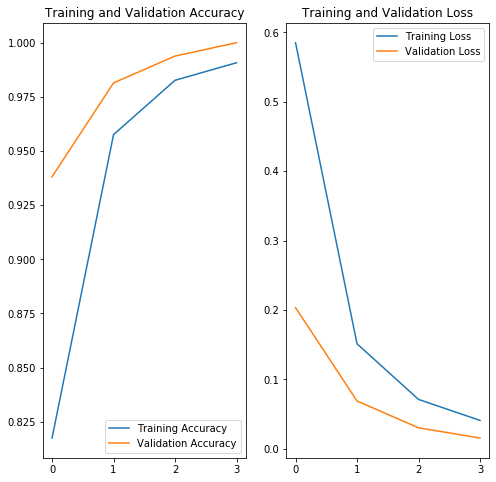

In [48]:
#visualize results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:

#OLD DONT RUN IT OLD VERSION!
batch_size = 128 #to be modified later on 128
epochs = 1 #to be modified later on 15
IMG_HEIGHT = 200
IMG_WIDTH = 200

#for the generator we can do some augmentation regarding the shifting later on
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

#load images, apply data generator, resize
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

#return batch from dataset in fomr os (x_train,y_train) <=> (features,labels)
sample_training_images, y = next(train_data_gen)
#print(y[:5])
#plotImages(sample_training_images[:5])

#So far, data is preprocessed and now we need to create the model for the NN
#This model is just for testing to be modified
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid')
])

# model = Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

#print the summary of our model
model.summary()
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(200, 200))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
#test predictions
test_image_path=r"C:\Users\User\Desktop\traffic_sign\gtsrb-german-traffic-sign\data1\test\0\00000_00000_00027.png"
test_image=load_image(test_image_path)
pred = model.predict_classes(test_image)
print(pred)
pred = model.predict(test_image)
print(pred)
print(np.argmax(pred[0]))




[[1]]
[[0.8483228]]
0
